# Week 9 Cluster Analysis

## Step 1 Generate Random Data

In [1]:
# Import the 'make_blobs' function from the 'sklearn' package to generate some data
from sklearn.datasets import make_blobs

# Import the 'matplotlib.pyplot' package so we can visualise the data
import matplotlib.pyplot as plt

In [2]:
# Specify how many data points (A.K.A. "samples" or "examples") we want in our data
n_samples = 1500

# Create some data X and some labels y
X_data, y_labels = make_blobs(n_samples=n_samples)

In [5]:
print(X_data)

[[ 8.3196199   9.85769456]
 [-4.96956176  7.01643534]
 [ 2.04893198  0.99713424]
 ...
 [-3.644368    7.16629656]
 [ 2.01221738 -2.87725289]
 [ 1.91546396  0.31267134]]


In [4]:
print(y_labels)

[0 1 2 ... 1 2 2]


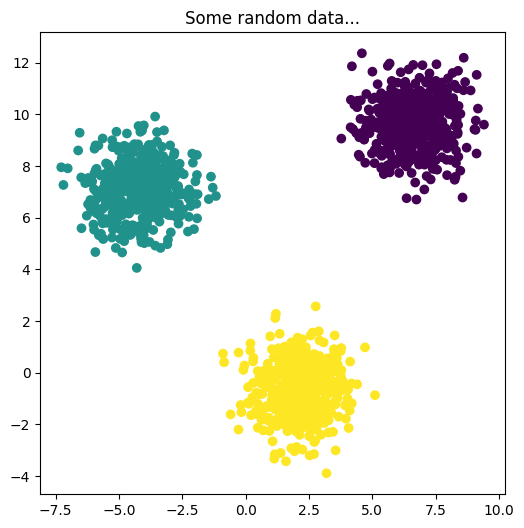

In [3]:
# Create a 'figure'
plt.figure(figsize=(6, 6))

# Create a scatter plot
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels)

# Give the scatter plot a title
plt.title("Some random data...")

# Show the scatter plot
plt.show()

### Side task 1 to advance your Python skills
You can skip these tasks if you think you are a Python pro. If not, update the code below to:
1. Change the figure title to be "Some toy data..."
2. Change the figure size to be 8 x 8 (who doesn't like big images?)
3. Change the scatter plot to show the same data, but with the axes swapped

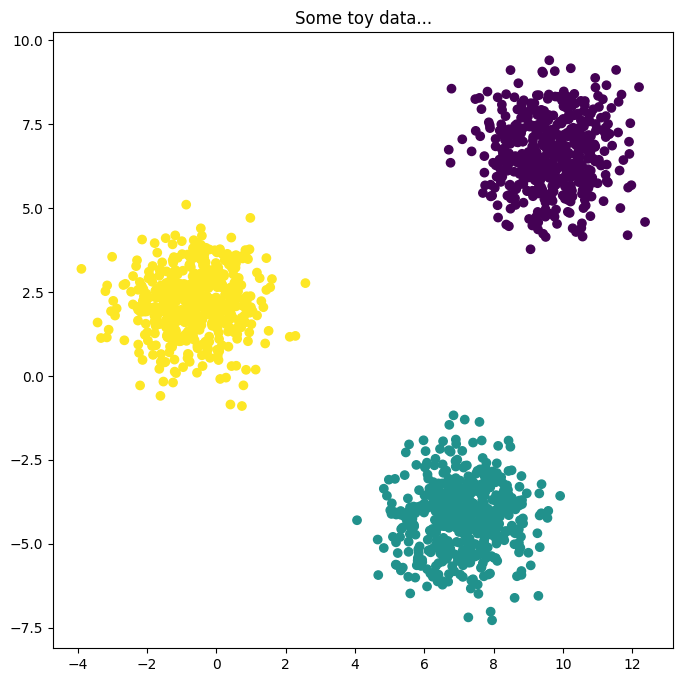

In [6]:
# Update this code...
plt.figure(figsize=(8, 8))
plt.scatter(X_data[:, 1], X_data[:, 0], c=y_labels)
plt.title("Some toy data...")
plt.show()

## Let's make a gallery of blobs!
Let's now create a gallery of blobs so that we can see multiple sets of random data at the same time and consider how particular characteristics of the data might impact the results of cluster analysis.

Run the code below to create a gallery of multiple random datasets.

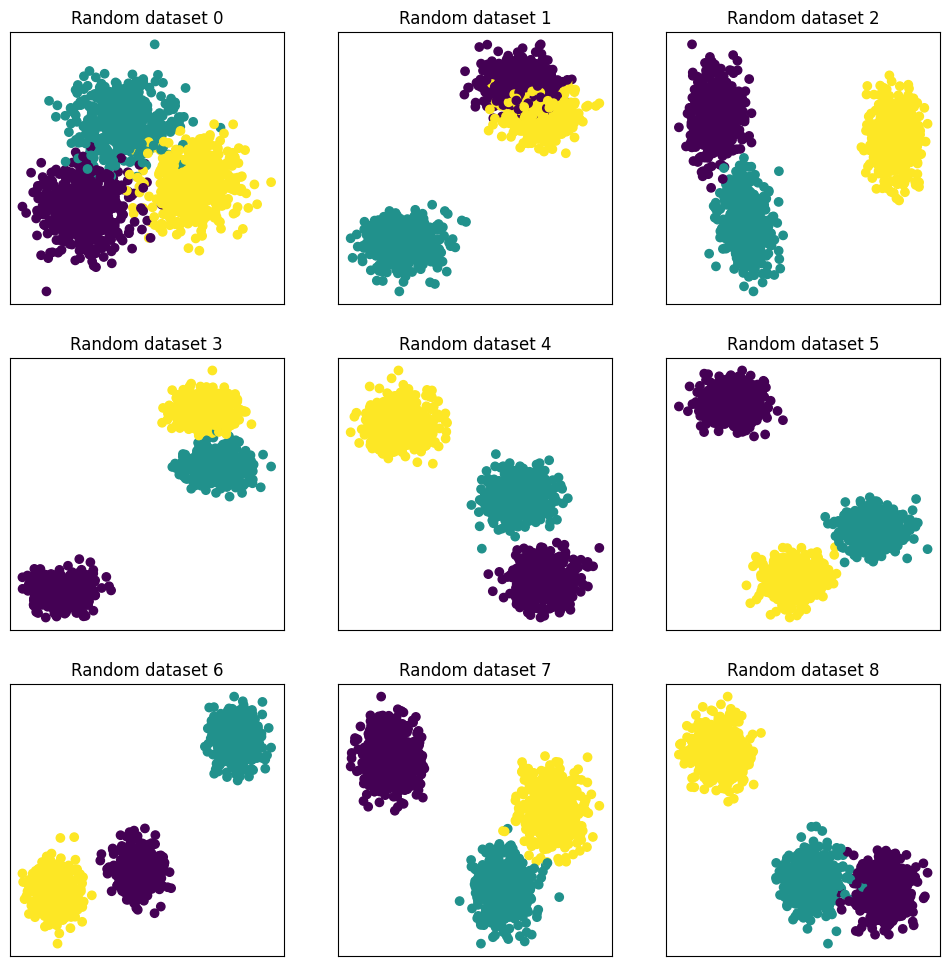

In [7]:
plt.figure(figsize=(12, 12))

n_samples = 1500
gallery_width = 3
gallery_height = 3

for i in range(gallery_width*gallery_height):
    # Generate some data
    X_data, y_labels = make_blobs(n_samples=n_samples)
    
    # Visualise the data (in a sub-plot)
    plt.subplot(gallery_height,gallery_width,i+1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels)
    plt.title(f"Random dataset {i}")
    plt.xticks([])
    plt.yticks([])

plt.show()

### Questions 1 to help develop your understanding
1. How do these datasets differ? What makes one dataset similar or different to another?
2. Given a random datapoint without a colour/label: (2a) when would it be easy to guess the colour/label of the datapoint? (2b) when would it be difficult to guess the colour/label of the datapoint?

### Side task 2 to advance your Python skills
1. What do you think `plt.xticks` and `plt.yticks` do? Remove them and run the code again and see if you can tell then. Are they needed?
2. How do you think `plt.subplot` works? If you think you know, then update the code to create a 3x3 or 5x5 gallery of random datasets?

## Let perform some cluster analysis!
OK, enough playing around, let's perform some serious cluster analysis :)

To do this, we are going to use the `KMeans` [method](https://en.wikipedia.org/wiki/K-means_clustering) from the `sklearn.cluster` package (which we will need to import). The code below is the same as above, but we are going to use the `KMeans` method to try to predict the labels of the data. I.e., we will pretend to not have access to the labels of the data, like with most real datasets. We will then visualise the data using the *predicted* labels (`y_predicted`) instead of the original labels (`y_label`).

Run the code below.

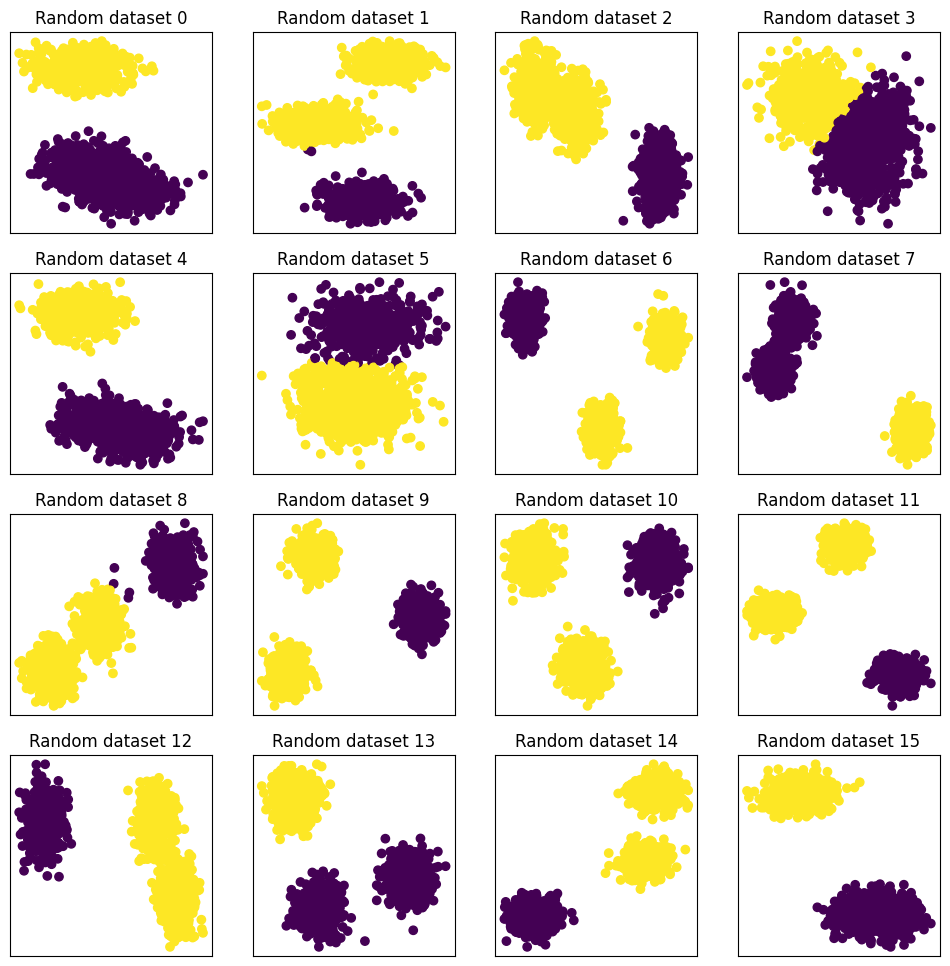

In [8]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))

n_samples = 1500
gallery_width = 4
gallery_height = 4

for i in range(gallery_width*gallery_height):
    # Generate some data
    X_data, y_labels = make_blobs(n_samples=n_samples)
    
    # !!! PERFORM CLUSTER ANALYSIS !!!
    y_predicted = KMeans(n_clusters=2).fit_predict(X_data)
    
    # Visualise the unlabelled data and the *predicted* labels
    plt.subplot(gallery_height,gallery_width,i+1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_predicted)
    plt.title(f"Random dataset {i}")
    plt.xticks([])
    plt.yticks([])

plt.show()

### Question 2 to help develop your understanding
1. How do the results look? 
2. What's wrong with the code above? How could it be improved?
3. What do you think the parameter `n_clusters` represents?

### Task 3 to improve your analytics skills
1. Set `n_clusters` in the code to a value you think makes most sense.
2. For which datasets do you think `KMeans` is more/less successful? Explain why.
3. Try increasing `n_clusters` beyond this number and explain what happens.

## Example of Kmeans Clustering

The file Shoe Sales Clusters.csv contains data on 3000 transactions made by 250 customers. Each transaction is for a dollar amount spent on one of five categories of shoes: athletic, dress, work, casual, or sandal. The goal is to find clusters of customers who have similar buying behavior.

In [12]:
# Assessing the data sample of Shoe Sales Cluster.csv
# Creating the dummy variables for the categories of shoes
import pandas as pd
df = pd.read_csv("./src/week9_shoe_sales_clusters.csv") 
df = pd.get_dummies(df, columns=['Type'])
df.head()

,Transaction,CustID,Spent,Type_Athletic,Type_Casual,Type_Dress,Type_Sandal,Type_Work
0,1,210,29,False,False,False,True,False
1,2,7,74,False,False,False,False,True
2,3,220,134,False,False,True,False,False
3,4,93,150,True,False,False,False,False
4,5,66,168,True,False,False,False,False


In [13]:
# We want to cluster customers, not transactions, 
# So we need to transform the data set in Pivot table, where each row is a transaction, 
# to a data set where each row is a customer.
pivot = df.pivot_table(index=['CustID'], 
    values=['Type_Athletic','Type_Casual','Type_Dress','Type_Sandal','Type_Work'], aggfunc='sum')
print(pivot)

        Type_Athletic  Type_Casual  Type_Dress  Type_Sandal  Type_Work
CustID                                                                
1                  10            2           2            1          1
2                   0            7           1            3          1
3                   0            1           9            0          0
4                   9            5           0            0          0
5                   9            2           0            1          2
...               ...          ...         ...          ...        ...
246                 0            5           2            1          2
247                 1            2           2            2          4
248                 0            4           4            3          0
249                 1            7           0            5          0
250                 1            5           0            0          8

[250 rows x 5 columns]


In [14]:
## Setting up the Kmeans analysis
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4)
kmeans.fit(pivot)

# Adding the cluster label to the observation
pivot["cluster"] = kmeans.labels_
pivot.head()

,Type_Athletic,Type_Casual,Type_Dress,Type_Sandal,Type_Work,cluster
CustID,,,,,,
1,10,2,2,1,1,0
2,0,7,1,3,1,1
3,0,1,9,0,0,2
4,9,5,0,0,0,0
5,9,2,0,1,2,0


         Type_Athletic  Type_Casual  Type_Dress  Type_Sandal  Type_Work
cluster                                                                
0                  368          125          43           33         30
1                   41          314          75          234         49
2                   48          188         476          168         46
3                   30          205          68           40        419


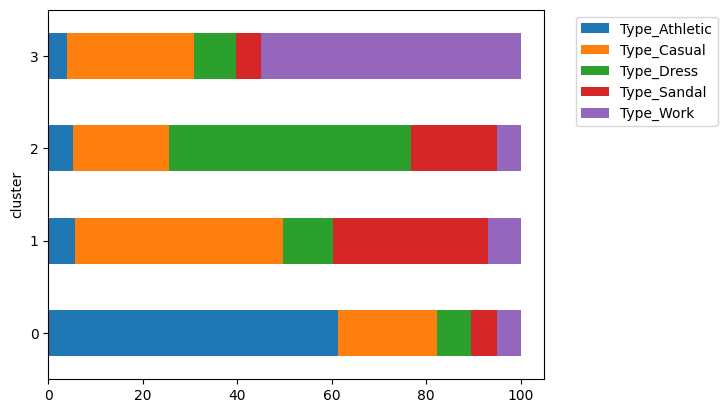

In [15]:
# Visualising the importance of attributes in each cluster group
pivot_cluster = pivot.pivot_table(index=['cluster'], 
    values=['Type_Athletic','Type_Casual','Type_Dress','Type_Sandal','Type_Sandal','Type_Work'], aggfunc='sum')
print(pivot_cluster)

# Creating stack plots for each cluster group by percentages
import matplotlib.pyplot as plt
plot_cluster_percentage = pivot_cluster.div(pivot_cluster.sum(axis=1), axis=0)*100
plot_cluster_percentage
plot_cluster_percentage.plot(kind="barh", stacked=True)
plt.legend(plot_cluster_percentage, bbox_to_anchor=(1.05,1))